# Capítulo 2: Fancy Tricks with Simple Numbers

### Bibliotecas básicas e outros imports

In [1]:
import json
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True, precision=3)

## Binarização

### Carregamento dos dados

In [2]:
listen_count = pd.read_csv('./datasets/train_triplets.txt', header=None, delimiter='\t')
print(listen_count.shape)
listen_count.head()

(48373586, 3)


,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


### Visualizando a contagem de escutas

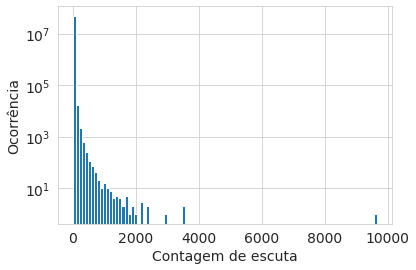

In [3]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
listen_count[2].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Contagem de escuta', fontsize=14)
ax.set_ylabel('Ocorrência', fontsize=14)
plt.show()

### Binarizando contagens de escuta no conjunto de dados de milhões de músicas

In [4]:
#Apenas contagens diferentes de zero são incluídas. 
#Para binarizar a contagem, precisamos apenas definir a coluna como 1
listen_count[2] = 1
listen_count.head(1)

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1


## Quantização ou Binning

### Carregamento dos dados

In [5]:
biz_file = open('./datasets/archive/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

print(biz_df.shape)
biz_df.head()

(160585, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


### Visualizando contagens de resenhas de negócios

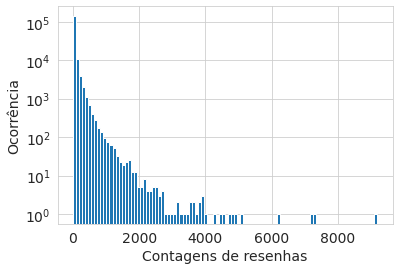

In [6]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Contagens de resenhas', fontsize=14)
ax.set_ylabel('Ocorrência', fontsize=14)
plt.show()

### Binning de largura fixa

In [7]:
small_counts = np.random.randint(0, 100, 20)
print(small_counts)
# Mapeie para caixas com espaçamento uniforme 0-9 por divisão
np.floor_divide(small_counts, 10)

[45 58 93 69 86 76 50 21 90 74 72 52 19  0 18 69 46 88 30 98]


array([4, 5, 9, 6, 8, 7, 5, 2, 9, 7, 7, 5, 1, 0, 1, 6, 4, 8, 3, 9])

In [8]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
# Mapeie para caixas de largura exponencial por meio da função de registro
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Bining de quantis

> Os quantis dividem os dados ordenados em q subconjuntos de dados de dimensão essencialmente igual. Ex.: Os 100-quantis são chamados percentis e os 4-quantis são chamados quartis.

In [9]:
#Mapeie as contagens para quartis
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

In [10]:
# Calcule os próprios quantis
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

Calculando decis das contagens de avaliações de negócios do Yelp

In [11]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1      6.0
0.2      7.0
0.3      9.0
0.4     12.0
0.5     17.0
0.6     24.0
0.7     35.0
0.8     57.0
0.9    117.0
Name: review_count, dtype: float64

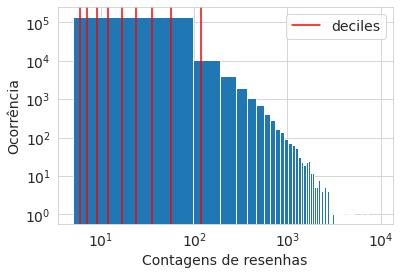

In [12]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)

for pos in deciles:
    handle = plt.axvline(pos, color='r')
    ax.legend([handle], ['deciles'], fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Contagens de resenhas', fontsize=14)
ax.set_ylabel('Ocorrência', fontsize=14)
plt.show()

## Transformação de log

In [13]:
## Calcula a transformação do log da contagem de revisão
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

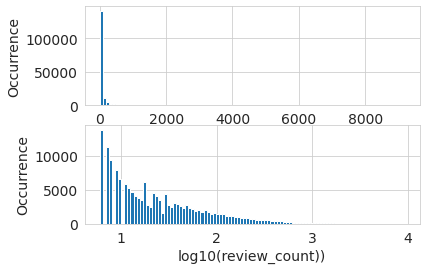

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1)

biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)
plt.show()

### Comparando modelos com e sem transformação de log

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Yelp review

In [16]:
m_orig = LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)

m_log = LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00113 (+/- 0.00050)
R-squared score with log transform: 0.00001 (+/- 0.00016)


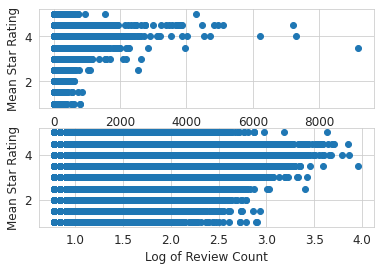

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Review Count', fontsize=12)
ax1.set_ylabel('Mean Star Rating', fontsize=12)

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=12)
ax2.set_xlabel('Log of Review Count', fontsize=12)
ax2.set_ylabel('Mean Star Rating', fontsize=12)
plt.show()

Online News Popularity

In [18]:
df = pd.read_csv('./datasets/OnlineNewsPopularity.csv', delimiter=', ')
print(df.shape)
df.sample()

(39644, 61)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
18985,http://mashable.com/2014/01/17/marijuana-america/,356.0,8.0,437.0,0.571429,1.0,0.773279,6.0,4.0,11.0,1.0,4.675057,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,662.0,153.7725,0.0,843300.0,427411.111111,0.0,7459.884467,4540.868896,783.0,783.0,783.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.022223,0.167722,0.022223,0.765611,0.022222,0.523276,0.183621,0.038902,0.01373,0.73913,0.26087,0.442647,0.1,1.0,-0.461111,-0.8,-0.166667,0.45,0.45,0.05,0.45,7900


In [19]:
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

m_orig = LinearRegression()
scores_orig = cross_val_score(m_orig, df[['n_tokens_content']], df['shares'], cv=10)

m_log = LinearRegression()
scores_log = cross_val_score(m_log, df[['log_n_tokens_content']], df['shares'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


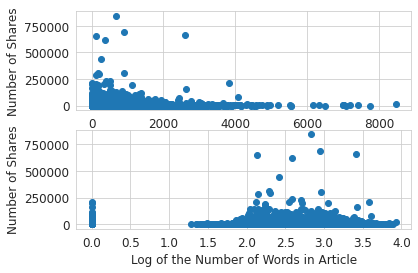

In [20]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Number of Words in Article', fontsize=12)
ax1.set_ylabel('Number of Shares', fontsize=12)

ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=12)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=12)
ax2.set_ylabel('Number of Shares', fontsize=12)
plt.show()

### Transformação Box-Cox

In [21]:
from scipy import stats

Transformação Box-Cox das contagens de avaliações de negócios do Yelp

In [24]:
#A transformação Box-Cox assume que os dados de entrada são positivos. Verifique o min para ter certeza.
biz_df['review_count'].min()

5

In [22]:
#Definir o parâmetro lmbda como 0 nos dá a transformação do log (sem deslocamento constante)
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.34662847518561846

Visualização dos histogramas das contagens originais, transformadas em log e transformadas em Box-Cox

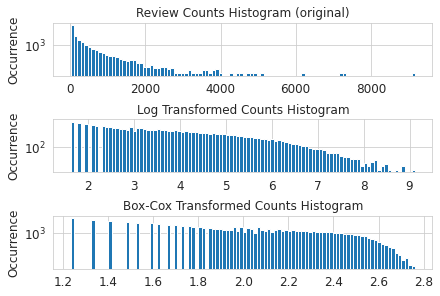

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, constrained_layout=True)
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=12)
ax1.set_title('Review Counts Histogram (original)', fontsize=12)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=12)

biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=12)
ax2.set_title('Log Transformed Counts Histogram', fontsize=12)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=12)

biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=12)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=12)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=12)
plt.show()

Probability plot

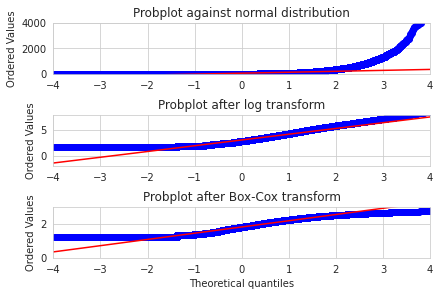

In [33]:
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, constrained_layout=True)
prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_xlim(-4, 4)
ax1.set_ylim(0, 4000)
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_xlim(-4, 4)
ax2.set_ylim(-2, 8)
ax2.set_title('Probplot after log transform')

prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_xlim(-4, 4)
ax3.set_ylim(0.0, 3.0)
ax3.set_title('Probplot after Box-Cox transform')
plt.show()

## Escala ou normalização de recursos

### Escala min-máx

$$\tilde{x} = \frac{x - min(x)}{max(x) - min(x)}$$

### Padronização (escala de variância) 

$$\tilde{x} = \frac{x - mean(x)}{\sqrt var(x)}$$

### Normalização l²

$$\tilde{x} = \frac{x}{\|x\|_2}$$